# Подготовка данных

In [189]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('kickstarter.csv')

In [190]:
df_2 = df.copy(deep=True)

In [191]:
df_2 = df_2[df_2['goal'] > 5]

# SMA для количества картинок 

In [192]:
img_max = df_2['n_img'].max()
# print(img_max)
# максимальное количество картинок в проектах

In [193]:
len_range = 3
# длина диапозона n_img
if x_max_for_analysis % len_range != 0:
  num_of_ranges = x_max_for_analysis // len_range + 1
else:
  num_of_ranges = x_max_for_analysis // len_range
# задаём количество диапозонов исследуемой переменной, полезно для оценки насколько подробным будет график
# print(num_of_ranges) что-то лишнее записалось, на 1 больше диапазон по факту получилось,
# потому num_of_ranges неверно показывает количество диапазонов

In [194]:
#for i in range(len(df_2["n_img"])):
  #k = df_2["n_img"].iloc[i] // len_range
  # номер диапазона в который попадёт проект
  #num_games_in_range[k] = num_games_in_range[k] + 1
#print(num_games_in_range)
# тут возможно из-за i которое было раньше доведено до определённого большого значения поломалось и out of range получилось

In [195]:
#our_n_img = []
#for m in range(0, len(df_2["n_img"])):
  #our_n_img.append(df_2['n_img'].iloc[m])
#our_n_img = sorted(our_n_img)
#df_3 = df_2.assign(sort_n_img=our_n_img)
# казалось нужно будет отсортировать столбец n_img, в итоге df_3 зря использовано было

In [196]:
def get_range(n, start, stop, step): # функция получения номера диапазона для конкретного значения n, где длина диапазона - step
# start и stop - начало и конец всего отрезка значений
    t = 0 # задаём номер первого диапазона
    for i in range(start, stop, step): # i - первое возможное значение в определённом диапазоне, например, i будет равно 0, 5, 10 etc для step = 5
        if n < i + step: # проверка на то, входит ли значение n в определённый диапазон или нет
          return t # выход из функции с возвращением искомого номера диапазона, если n входит в этот диапазон
        t += 1 # если в диапазон с номером t не входит значение n, смотрим следующий за t диапазон (то есть t+1)
    return t # если что-то не влезло во время цикла - оно будет закинуто в последний (так как t после цикла максимальное) диапазон

ranges = [] # список содержит номер диапазона каждого из проектов, длина списка - количество проектов

for idx, row in df_2.iterrows(): # iterrows() возвращает индекс (idx) и значение строки (rows) датафрейма, т.о. перебираем построчно датафрейм
  ranges.append(get_range(row[8], 0, img_max, len_range)) # добавляем в список номер диапазона для каждой строки т.е. каждого проекта
  # row[8] - значение столбца с индексом 8 т.е. n_img конкретной строки
ranges = pd.Series(ranges, dtype=int) # преобразование типа ranges из списка в Series чтобы добавить Series в датафрейм как столбец
df_4 = df_2.assign(image_range=ranges.values) # значения Series с помощью .values получаем и заносим в новый столбец image_range
df_4

,Unnamed: 0,URL,pled,goal,date,period,status,text_am,n_img,n_vid,n_pled_t,min_pled_t,max_pled_t,mean_pled_t,step_pled_t,cr_time,backed,created,site,rpg,platformer,shooter,fighting,survival,horror,strategy,arcade,simulator,mmo,indie,action,quest,adventure,mgp,cont,curr,succsess,is_site,image_range
0,8438,https://www.kickstarter.com/projects/577038691...,16.37,16368.00,2013-12-01,14,ended,355,7,0,8,1.64,8184.00,1206.321250,1168.908571,16,0,0,NaN,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0.653856,0.276952,GBP,0,0,2
1,3182,https://www.kickstarter.com/projects/200047954...,124761.28,7278.02,2015-08-03,30,ended,2218,33,3,5,3.64,99.71,43.960000,24.017500,592,3,1,blackwake.com,0,0,1,0,0,0,1,0,0,0,0,1,0,0,6.105621,0.220415,AUD,1,1,11
2,7977,https://www.kickstarter.com/projects/85660245/...,1211.00,35000.00,2013-04-12,31,ended,3174,19,3,13,5.00,1000.00,312.692308,82.916667,253,2,0,swiftcreekgames.com,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.556285,0.289384,USD,0,1,6
3,1270,https://www.kickstarter.com/projects/193393221...,1.00,10000.00,2013-11-13,14,ended,110,0,0,3,25.00,1000.00,425.000000,487.500000,195,0,0,hobbisoft.com,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,USD,0,1,0
4,6312,https://www.kickstarter.com/projects/148102341...,5415.00,67000.00,2016-04-25,30,ended,3955,46,1,15,1.00,1000.00,165.866667,71.357143,20,3,0,stellartactics.com,1,0,0,1,0,0,1,0,0,0,0,1,0,1,5.987628,0.256332,USD,0,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8416,8202,https://www.kickstarter.com/projects/501263634...,2246.00,7000.00,2014-03-11,60,ended,912,10,0,8,10.00,1000.00,366.875000,141.428571,191,0,1,regalcomputerservices.com,0,0,0,0,0,0,0,0,0,0,1,0,1,0,3.246320,0.220351,USD,0,1,3
8417,3125,https://www.kickstarter.com/projects/154070452...,18021.00,15000.00,2015-09-22,45,ended,1650,39,2,23,1.00,8000.00,733.434783,363.590909,146,21,1,ddt-games.com,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.707396,0.230234,USD,1,1,13
8418,322,https://www.kickstarter.com/projects/101642300...,14.00,10000.00,2016-02-17,30,ended,280,10,1,9,1.00,200.00,67.888889,24.875000,703,0,1,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.763008,0.328798,USD,0,0,3
8419,1098,https://www.kickstarter.com/projects/173840524...,82.88,3928.54,2014-05-31,31,ended,777,0,0,7,4.60,92.09,40.124286,14.581667,93,1,0,NaN,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.000000,0.000000,CAD,0,0,0


In [197]:
success_rate = df_3['pled'] / df_3['goal'] 
df_4['success_rate'] = success_rate # добавляем столбец success_rate так как на графике по оси ординат будет среднее арифметическое success_rate

In [198]:
num_games_in_range = [0] * (df_4["image_range"].max() + 1)
# массив с количеством проектов в этом диапазоне
sum_range = [0] * (df_4["image_range"].max() + 1)
# сумма success_rate проектов в этом диапазоне
sma_range = [0] * (df_4["image_range"].max() + 1)
# среднее арифметическое (SMA) в этом диапазоне

In [199]:
for f in range(0, len(df_4["n_img"])): # перебор по всем проектам в датафрейме, от 0 на случай если f было раньше где-то использовано
  this_range = df_4['image_range'].iloc[f] # переменная хранит номер диапазона конкретного проекта
  num_games_in_range[this_range] += 1 # добавляем 1 к количеству проектов в определённом диапазоне
print(num_games_in_range)

[2617, 882, 724, 576, 501, 430, 366, 318, 307, 261, 237, 185, 165, 159, 127, 97, 94, 65, 66, 54, 35, 33, 22, 21, 15, 12, 6, 5, 5, 2, 0, 4, 4, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [200]:
for f in range(0, len(df_4["n_img"])): # перебор по всем проектам в датафрейме, от 0 на случай если f было раньше где-то использовано
  this_range = df_4['image_range'].iloc[f] # переменная хранит номер диапазона конкретного проекта
  sum_range[this_range] += df_4['success_rate'].iloc[f] # суммируем success_rate всего диапазона с success_rate конкретного проекта
print(sum_range)

[613.7749368936771, 612.7015443945345, 478.04681614198427, 373.0134358630565, 511.1069253567313, 468.582025461244, 874.9976522927307, 303.37409092756724, 656.0626256589233, 228.4674378266516, 194.81325624445222, 159.61378734671564, 165.11524271262903, 163.57268662467703, 115.13332071784045, 101.2704885497984, 105.33105162261315, 65.88594205928649, 74.2984206097231, 51.46192236983214, 32.18202846183942, 35.04890661044238, 20.40994120669833, 25.609314496853447, 11.815570279931897, 53.25758239895338, 35.198881577959575, 2.784272091594027, 22.800582, 2.2016233333333335, 0, 5.330908060264811, 7.097180874864764, 1.2097875, 0, 2.0469666375282047, 2.939454530445822, 1.6759692307692309, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.03425]


In [201]:
for f in range(0, df_4["image_range"].max() + 1):
  if num_games_in_range[f] == 0: # на 0 не делим
    sma_range[f] = 0
  else:
    sma_range[f] = sum_range[f] / num_games_in_range[f]
# вычисляем среднее арифметическое success_rate по диапазону - это SMA (простая скользящая средняя)
print(sma_range)

[0.2345337932341143, 0.6946729528282704, 0.6602856576546744, 0.6475927705955842, 1.0201735037060506, 1.0897256406075442, 2.390703968012925, 0.9540065752439222, 2.1370118099639193, 0.8753541679182054, 0.8219968617909377, 0.8627772289011656, 1.0006984406826, 1.0287590353753273, 0.9065615804554366, 1.0440256551525608, 1.1205431023682249, 1.0136298778351769, 1.1257336456018652, 0.9529985624042988, 0.9194865274811264, 1.0620880791043146, 0.9277246003044696, 1.2194911665168309, 0.7877046853287931, 4.4381318665794485, 5.866480262993263, 0.5568544183188054, 4.5601164, 1.1008116666666667, 0, 1.3327270150662027, 1.774295218716191, 1.2097875, 0, 1.0234833187641024, 1.469727265222911, 1.6759692307692309, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.03425]


In [202]:
in_x = [] # ось х заполняем значениями границ диапазонов
k = 0
while k <= img_max:
  in_x.append(k)
  k += len_range

In [203]:
in_y = sma_range # задаём ось у значениями среднего арифметического в этом диапазоне

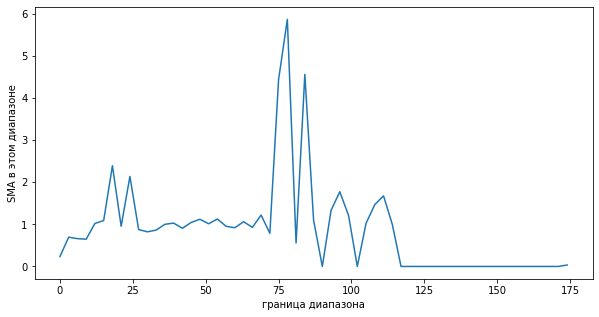

In [226]:
plt.figure(figsize=(10, 5)) # устанавливаем размер графика - 5 * 10 дюймов
plt.xlabel("граница диапазона")
# подписываем ось Х
plt.ylabel("SMA в этом диапазоне")
# подписываем ось У
plt.plot(in_x, in_y) # строим график с скользящей средней n_img
plt.show()

# SMA для количества слов

In [205]:
text_max = df_2['text_am'].max()
# максимальное количество слов в проектах
# print(text_max)

In [206]:
len_range_2 = 100
# длина диапозона text_am

In [207]:
ranges_2 = [] # список содержит номер диапазона каждого из проектов, длина списка - количество проектов

for idx, row in df_2.iterrows(): # iterrows() возвращает индекс (idx) и значение строки (rows) датафрейма, т.о. перебираем построчно датафрейм
  ranges_2.append(get_range(row[7], 0, text_max, len_range_2)) # добавляем в список номер диапазона для каждой строки т.е. каждого проекта
  # row[7] - значение столбца с индексом 7 т.е. text_am конкретной строки
ranges_2 = pd.Series(ranges_2, dtype=int) # преобразование типа ranges_2 из списка в Series чтобы добавить Series в датафрейм как столбец
df_4 = df_4.assign(text_range=ranges_2.values) # значения Series с помощью .values получаем и заносим в новый столбец text_range
# df_4["text_range"].max() проверка что количество диапазонов адекватное число

In [208]:
num_games_in_range_2 = [0] * (df_4["text_range"].max() + 1)
# массив с количеством проектов в этом диапазоне
sum_range_2 = [0] * (df_4["text_range"].max() + 1)
# сумма success_rate проектов в этом диапазоне
sma_range_2 = [0] * (df_4["text_range"].max() + 1)
# среднее арифметическое (SMA) в этом диапазоне

In [209]:
for f in range(0, len(df_4["text_am"])): # перебор по всем проектам в датафрейме, от 0 на случай если f было раньше где-то использовано
  this_range = df_4['text_range'].iloc[f] # переменная хранит номер диапазона конкретного проекта
  num_games_in_range_2[this_range] += 1 # добавляем 1 к количеству проектов в определённом диапазоне
print(num_games_in_range_2)

[197, 547, 610, 628, 550, 466, 455, 443, 387, 362, 338, 312, 285, 268, 244, 234, 220, 183, 178, 159, 156, 120, 101, 102, 106, 93, 61, 65, 71, 47, 56, 35, 30, 34, 30, 25, 28, 33, 20, 16, 25, 11, 13, 13, 13, 9, 6, 6, 2, 1, 3, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1]


In [210]:
for f in range(0, len(df_4["text_am"])): # перебор по всем проектам в датафрейме, от 0 на случай если f было раньше где-то использовано
  this_range = df_4['text_range'].iloc[f] # переменная хранит номер диапазона конкретного проекта
  sum_range_2[this_range] += df_4['success_rate'].iloc[f] # суммируем success_rate всего диапазона с success_rate конкретного проекта
print(sum_range_2)

[17.289804317261773, 80.15974458039997, 158.92407154823172, 181.34405282953674, 304.6395890865917, 299.15638638143804, 251.93128313108866, 828.7712935844288, 407.470930471729, 631.4894089634221, 268.1084242927531, 258.2401082874064, 248.8962646922673, 162.88578374196845, 218.55797335477624, 257.3402188246366, 168.63700046512827, 206.76618449210437, 138.55850199635483, 136.42845886214016, 129.5476965874454, 136.68637214404603, 91.98741512897703, 78.01525014751616, 85.45300071715464, 70.4178787516187, 70.38702495682736, 50.9208672266857, 98.3291726849847, 42.63883206397163, 52.32629986018205, 51.817702492703184, 19.966555191957838, 52.8156346896306, 40.43239474472535, 17.72096553644857, 26.873583456458583, 64.86801972174173, 32.961299617493545, 10.937696983419054, 20.899187045276165, 9.756757349037823, 39.68533248675912, 17.328886486531424, 22.056652794832893, 7.1756346380890905, 5.677474609584571, 5.447543736983217, 0.24124788047118184, 0.06659272574261321, 0.03955, 0, 0.122499753400335

In [211]:
for f in range(0, df_4["text_range"].max() + 1):
  if num_games_in_range_2[f] == 0: # на 0 не делим
    sma_range_2[f] = 0
  else:
    sma_range_2[f] = sum_range_2[f] / num_games_in_range_2[f]
# вычисляем среднее арифметическое success_rate по диапазону - это SMA (простая скользящая средняя)
print(sma_range_2)

[0.08776550414853691, 0.1465443228160877, 0.26053126483316674, 0.2887644153336572, 0.5538901619756212, 0.6419664943807684, 0.5536951277606345, 1.8708155611386654, 1.0528964611672584, 1.7444458811144257, 0.7932201902152459, 0.8276926547673281, 0.8733202269904116, 0.6077827751565987, 0.8957293989949846, 1.0997445248916096, 0.7665318202960376, 1.129869860612592, 0.7784185505413193, 0.8580406217744664, 0.8304339524836243, 1.1390531012003835, 0.9107664864255152, 0.7648553936030996, 0.8061603841241004, 0.7571814919528893, 1.1538856550299568, 0.7833979573336262, 1.3849179251406296, 0.9072091928504602, 0.9343982117889651, 1.4805057855058052, 0.6655518397319279, 1.5534010202832529, 1.347746491490845, 0.7088386214579429, 0.9597708377306636, 1.965697567325507, 1.6480649808746772, 0.6836060614636909, 0.8359674818110466, 0.8869779408216203, 3.0527178835968556, 1.332991268194725, 1.6966655996025302, 0.7972927375654545, 0.9462457682640952, 0.9079239561638696, 0.12062394023559092, 0.06659272574261321,

In [212]:
in_x_2 = [] # ось х заполняем значениями границ диапазонов
k = 0
while k <= text_max:
  in_x_2.append(k)
  k += len_range_2

In [213]:
in_y_2 = sma_range_2 # задаём ось у значениями среднего арифметического в этом диапазоне

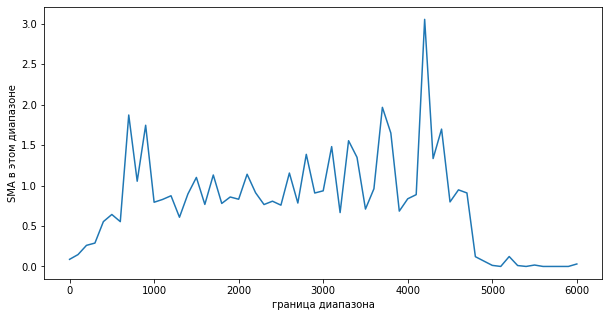

In [227]:
plt.figure(figsize=(10, 5)) # устанавливаем размер графика - 5 * 10 дюймов
plt.xlabel("граница диапазона")
# подписываем ось Х
plt.ylabel("SMA в этом диапазоне")
# подписываем ось У
plt.plot(in_x_2, in_y_2) # строим график с скользящей средней n_img
plt.show()